# Main file for executions

In [1]:
from src.load_data import get_data
from src.train import FederatedLearning
from src.config import Config, load_train_config

import torch
torch.manual_seed(101)

## Specify parameters

### Manually set config

In [4]:
kwargs = {
    # Main mode
    "mode": "classification",  # prediction or classification

    # Model config
    "model": "RNN",  # LSTM or RNN
    # "hidden_dim": 32,
    "num_layers": 1,
    "dropout": 0.0,

    # Training config
    "epochs": 1000,
    "lr": 0.01,
    "batch_size": 128
}

config = Config(**kwargs)

In [63]:
# Save config
# config.save("default_pred_rnn")

Config saved in: config/config_default_pred_rnn.json


### Load saved config

In [23]:
config = load_train_config("config_default_class_rnn")
print(config)

Config loaded from: config/config_default_class_rnn.json
CONFIG:
  mode: classification
  test_size: 0.2
  val_size: 0.1
  shuffle: True
  seed: 42
  model: RNN
  input_dim: 96
  hidden_dim: 128
  output_dim: 10
  num_layers: 1
  dropout: 0.0
  epochs: 1000
  lr: 0.3
  batch_size: 128
  eval_steps: 50


## Run FL training

In [24]:
x_train, x_val, x_test, y_train, y_val, y_test = get_data(config)

In [25]:
fl = FederatedLearning(config)
fl.train(x_train, y_train, x_val, y_val)

Epoch: 50,  train loss: 2.27676, val loss: 2.25680
Epoch: 100,  train loss: 2.23710, val loss: 2.17729
Epoch: 150,  train loss: 2.19464, val loss: 2.06769
Epoch: 200,  train loss: 2.08560, val loss: 1.95559
Epoch: 250,  train loss: 2.05257, val loss: 1.85276
Epoch: 300,  train loss: 2.01023, val loss: 1.76449
Epoch: 350,  train loss: 1.88684, val loss: 1.69091
Epoch: 400,  train loss: 1.92338, val loss: 1.63568
Epoch: 450,  train loss: 1.87557, val loss: 1.59124
Epoch: 500,  train loss: 1.76151, val loss: 1.55887
Epoch: 550,  train loss: 1.79896, val loss: 1.53201
Epoch: 600,  train loss: 1.76551, val loss: 1.51395
Epoch: 650,  train loss: 1.91337, val loss: 1.49779
Epoch: 700,  train loss: 1.75824, val loss: 1.48416
Epoch: 750,  train loss: 1.73075, val loss: 1.47392
Epoch: 800,  train loss: 1.80168, val loss: 1.46508
Epoch: 850,  train loss: 1.76174, val loss: 1.45449
Epoch: 900,  train loss: 1.67766, val loss: 1.44782
Epoch: 950,  train loss: 1.83872, val loss: 1.44169
Epoch: 1000, 

### Analysis

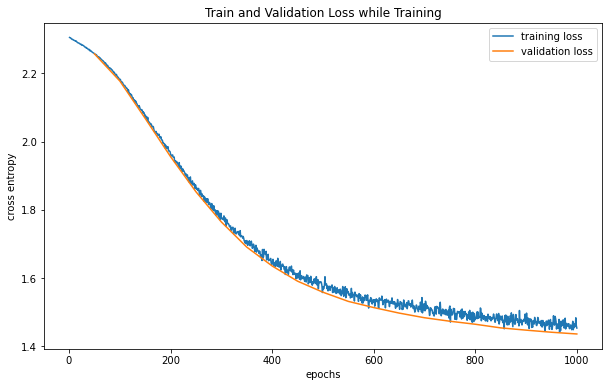

In [26]:
fl.plot_training_loss()

In [27]:
fl.evaluate(x_test, y_test)

[[4650    0    0    0    0    0    0    0    0    0]
 [1569  148  813  368    0   49   37   12  704    0]
 [ 524  488 1485  247    0  188   85   40  543    0]
 [1947    0    1 1610    0   62   30    0    0    0]
 [ 270  193  198   93 2011   34   87  110   83  671]
 [ 100   13    2   60    0 2681   38   44  312    0]
 [ 749    0   71  243    5  173  929  732  598    0]
 [2189    0   81  154   42    0  225  302  557    0]
 [1484    6    2    0    0    0    0    0 1808    0]
 [ 225   41    0    8   42    0    0    0   54 3180]]
--------------------
Test cross entropy: 1.4799950122833252
Accuracy:           0.5152
Precision (micro):  0.5152
Recall (micro):     0.5152
F1 Score (micro):   0.5152
Precision (macro):  0.5549
Recall (macro):     0.5049
F1 Score (macro):   0.4884


## Run training with aggregated data

In [28]:
x_train, x_val, x_test, y_train, y_val, y_test = get_data(config)

# Stack data to aggregate all households to one
x_train, x_val, x_test = [arr.reshape(1, arr.shape[0] * arr.shape[1], arr.shape[2]) for arr in [x_train, x_val, x_test]]
y_train, y_val, y_test = [arr.reshape(1, arr.shape[0] * arr.shape[1]) for arr in [y_train, y_val, y_test]]

In [29]:
fl = FederatedLearning(config)
fl.train(x_train, y_train, x_val, y_val)

Epoch: 50,  train loss: 2.26772, val loss: 2.26274
Epoch: 100,  train loss: 2.19101, val loss: 2.18331
Epoch: 150,  train loss: 2.08174, val loss: 2.07046
Epoch: 200,  train loss: 1.95683, val loss: 1.96887
Epoch: 250,  train loss: 1.95289, val loss: 1.86406
Epoch: 300,  train loss: 1.81568, val loss: 1.77669
Epoch: 350,  train loss: 1.79064, val loss: 1.70454
Epoch: 400,  train loss: 1.64206, val loss: 1.63807
Epoch: 450,  train loss: 1.70004, val loss: 1.59740
Epoch: 500,  train loss: 1.64336, val loss: 1.57532
Epoch: 550,  train loss: 1.54867, val loss: 1.53441
Epoch: 600,  train loss: 1.59404, val loss: 1.52126
Epoch: 650,  train loss: 1.49772, val loss: 1.50994
Epoch: 700,  train loss: 1.50585, val loss: 1.52610
Epoch: 750,  train loss: 1.42173, val loss: 1.48999
Epoch: 800,  train loss: 1.46110, val loss: 1.47758
Epoch: 850,  train loss: 1.36800, val loss: 1.48250
Epoch: 900,  train loss: 1.44022, val loss: 1.45002
Epoch: 950,  train loss: 1.49817, val loss: 1.45020
Epoch: 1000, 

### Analysis

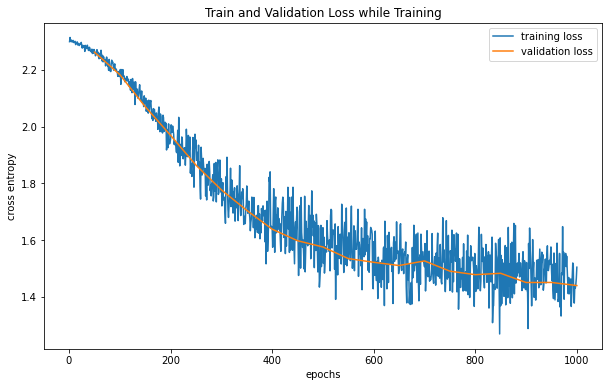

In [30]:
fl.plot_training_loss()

In [31]:
fl.evaluate(x_test, y_test)

[[4650    0    0    0    0    0    0    0    0    0]
 [1569  106  950  386    0   22   15    4  648    0]
 [ 524  392 1751  256    0  153   36   16  472    0]
 [1947    0    1 1673    0   23    6    0    0    0]
 [ 270  160  271   99 1802   31   90   73   80  874]
 [  77   54    7  211    0 2727    1    0  173    0]
 [ 749   37  175  309   17  162  853  564  634    0]
 [2189   35  129  155   62    0  214  272  494    0]
 [1484   63    2    0    0    3    0    0 1748    0]
 [ 225   35    4   10    4   19    0    0   35 3218]]
--------------------
Test cross entropy: 1.4915711879730225
Accuracy:           0.5151
Precision (micro):  0.5151
Recall (micro):     0.5151
F1 Score (micro):   0.5151
Precision (macro):  0.5546
Recall (macro):     0.505
F1 Score (macro):   0.4837
